# ニューラルネットワーク

## 【事前準備】

In [1]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

In [2]:
## モジュールのインポート ##
# 一般
import random
import math
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
# Keras
from keras.datasets import mnist
# その他
from google.colab import drive #GoogleDriveモジュール
# drive.mount('/content/drive') #GoogleDriveのマウント

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## 【実装】

### ●MNISTのデータセット

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

# 各画像のピクセルデータを平滑化（28x28 ⇒ 784x1）
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

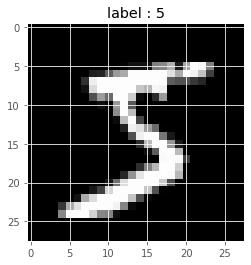

In [4]:
## 画像を可視化 ##
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

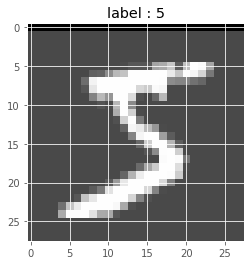

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [   0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.  ]
 [   0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.  ]
 [   0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.  ]
 [   0.      0.      0.      0.      0.      0.      0.      0.      0.
     0.      0

In [5]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
# image -= 105.35 # 意図的に負の小数値を作り出してみる
image[0] = -105.35 # 意図的に負の小数値を作り出してみる

# 自動スケーリングあり
plt.imshow(image, 'gray')   # 最小値が0となるように自動的にスケーリングされる
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image[:10]) # 値を確認

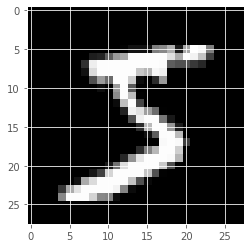

In [6]:
# 自動スケーリング無し
plt.imshow(image, 'gray', vmin = 0, vmax = 255);   # 範囲外の値は0 or 255に置換される (自動スケールされない)

In [7]:
## 画像データを正規化 ##
# X_train1 = X_train.astype(np.float) / 255
# X_test1 = X_test.astype(np.float) / 255
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
print(X_train_transformed.max()) # 1.0
print(X_test_transformed.min()) # 0.0

1.0
0.0


In [8]:
## One Hot Encoding ##
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train)
print(y_train_one_hot)

(60000,)
(60000, 10)
float64
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.8)
# print(X_train1.shape) # (48000, 784)
# print(X_test1.shape) # (12000, 784)
# print(y_train1.shape) # (48000,)
# print(y_test1.shape) # (12000,)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.99)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_transformed[:6000, :], y_train[:6000], train_size=0.8)
print(X_train2.shape) # (4800, 784)
print(X_test2.shape) # (1200, 784)
print(y_train2.shape) # (4800,)
print(y_test2.shape) # (1200,)

(59400, 784)
(600, 784)
(59400,)
(600,)
(4800, 784)
(1200, 784)
(4800,)
(1200,)


### ●ScratchSimpleNeuralNetrowkClassifierクラス

In [10]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, node_num_list=[400, 200, 10], active_func_name_list=["sigmoid", "sigmoid", "softmax"], epoch=1, lr=0.1, batch_size=20, sigma=0.01, random_state=None, verbose=True):
        # 引数のチェック
        if (len(node_num_list) != len(active_func_name_list)):
            print("Warning: node_num_listとactive_func_name_listの長さが一致していません!!  強制終了します!!!!!!!!!!!!!!!!!!!!")
            return

        self.verbose = verbose
        self.layer_num = len(node_num_list)   # 層の数
        # 活性化関数の名称とメソッドの参照との対応表
        self.active_func_dic = {"sigmoid": [self._sigmoid_func,   self._sigmoid_backward],
                                "tanh":    [self._tanh_func,      self._tanh_backward],
                                "softmax": [self._softmax_func,   self._softmax_backward]}
        # 活性化関数のリスト（# 第1層、第2層、・・・、出力層の活性化関数および逆伝播処理の参照を順にリストへ詰め込む）
        active_func_list = []
        for active_func_name in active_func_name_list:
            active_func_list.append(self.active_func_dic[active_func_name])
        # self.iter = iter
        self.epoch = epoch  # エポック
        self.lr = lr   # 学習率
        self.batch_size = batch_size    # バッチサイズ
        # 各層で扱う変数（W, B, A, Z、ノード数、活性化関数の参照）を管理するためのクラスのリスト（層の数だけ用意）
        self.layer = []
        for node_num, [active_func, backward_func] in zip(node_num_list, active_func_list):
            self.layer.append(Layer(node_num, active_func, backward_func))
        self.sigma = sigma    # 重みの初期値の決定時に使用する正規分布の標準偏差
        self.random_state = random_state
        np.random.seed(random_state)   #乱数シードを設定
        self.enc = OneHotEncoder(handle_unknown='ignore', sparse=False)   # OneHotエンコーダ
        self.loss = np.array([])    # 損失関数（学習データ）
        self.val_loss = np.array([])    # 損失関数（検証データ）

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        n_samples = X.shape[0]    # サンプル数

        # 学習に使用する各種変数を初期化
        self._init_variables(X)

        # 学習データの目的変数をOneHotエンコーディング
        Y = self.enc.fit_transform(y[:, np.newaxis])
        # ミニバッチ学習用のクラス作成
        get_mini_batch = GetMiniBatch(X, Y, batch_size=self.batch_size, seed=self.random_state)

        # 検証データも与えられている場合
        if ((X_val is not None) and (y_val is not None)):
            # OneHotエンコーディング
            Y_val = enc.transform(y_val[:, np.newaxis])
            # # ミニバッチ学習用のクラス作成
            # get_mini_batch_val = GetMiniBatch(X_val, Y_val, batch_size=self.batch_size, seed=self.random_state)


        # エポックの回数ループ
        for j in range(self.epoch):
            if self.verbose:   print("エポック{}回目".format(j))   # デバッグ情報出力
            get_mini_batch.__iter__()  # ミニバッチのイテレータを取得

            # イテレーションの回数だけパラメータW・Bの更新を実行
            for i in range(self.iter):
                if self.verbose:   print("■イテレーション{}回目".format(i))   # デバッグ情報出力
                X_mini, Y_mini = get_mini_batch.__next__()  # バッチデータ取得
                Z = self._forward_propagation(X_mini)   # 順伝播処理
                self._backward_propagation(X_mini, Y_mini)   # 逆伝播処理
                self.loss = np.append(self.loss, self._calcurate_loss(Y_mini, Z))   # 損失算出

                # 検証データも与えられている場合は検証データに対しても同様の処理を行う
                if ((X_val is not None) and (y_val is not None)):
                    # X_mini_val, Y_mini_val = get_mini_batch_val.__next__()  # バッチデータ取得
                    Z_val = self._forward_propagation_test(X_val)   # 順伝播処理
                    self.val_loss = np.append(self.val_loss, self._calcurate_loss(Y_val, Z_val))   # 損失算出

        if self.verbose:   print("■学習完了")
        return

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred    次の形のndarray, shape (n_samples, )
            ラベルの推定値
        """
        Z = self._forward_propagation_test(X)   # 順伝播処理
        y_pred = np.argmax(Z, axis=1)   
        return  y_pred

    def predict_proba(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred_proba    次の形のndarray, shape (n_samples, n_output)
            ラベルの各クラスごとの確率の推定値
        """
        y_pred_proba = self._forward_propagation_test(X)   # 順伝播処理
        return  y_pred_proba

    def plot_learning_curve(self):
        """
        学習曲線をプロットする関数
        Parameters
        ----------
        None
        Returns
        -------
        None
        """
        # 学習データと検証データのそれぞれの損失関数の値をグラフに描画
        fig, ax = plt.subplots(figsize=(15, 10), dpi=50)
        ax.set_title("Learning Curve")
        ax.set_xlabel("Iteration Number")
        ax.set_ylabel("Loss")
        ax.plot(self.loss, color = "blue", label="train")
        ax.plot(self.val_loss, color = "red", label="validation")
        ax.legend(loc='best') # 凡例を最適位置に表示
        plt.show()
        return

    def _init_variables(self, X):
        """
        学習に使用する各種変数を初期化する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        None
        """
        n_samples = X.shape[0]    # サンプル数
        n_features = X.shape[1]    # 特徴量の数
        prev_node_num = n_features   # 前層のノード数（初期値: 特徴量の数）

        self.iter = int(n_samples / self.batch_size)   # イテレーション数

        # 各層の重み（W）とバイアス（B）の配列を順番に生成
        for i in range(self.layer_num):
            if self.verbose:   print("■{}層目".format(i))   # デバッグ情報出力
            current_node_num = self.layer[i].node_num
            # 重みとバイアスの配列（前層のノード数 x 当層のノード数）を、正規分布に従う乱数で初期化して生成
            self.layer[i].W = self.sigma * np.random.randn(prev_node_num, current_node_num)
            self.layer[i].B = self.sigma * np.random.randn(current_node_num)
            # # 重みとバイアスの配列（前層のノード数 x 当層のノード数）を、0パディングして生成
            # self.layer[i].W = np.zeros((prev_node_num, current_node_num))
            # self.layer[i].B = np.zeros((current_node_num))

            # 前層のノード数を、当層のノード数で更新
            prev_node_num = current_node_num

        if self.verbose:   print("■_init_variablesメソッド終了")  # デバッグ情報出力
        return

    def _forward_propagation(self, X):
        """
        入力層から出力層まで順伝播の計算を実行する（学習データ用）
        ・A = Zprev @ W +B
        ・Z = active_func(A)
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (batch_size, o_output)
            出力層の出力
        """
        if self.verbose:   print("■_forward_propagationメソッド開始")   # デバッグ情報出力

        Zprev = X

        # 各層のAとZを、入力層から順番に算出
        for i in range(self.layer_num):
            if self.verbose:   print("■{}層目".format(i))   # デバッグ情報出力
            # 当層のW、B、活性化関数を取得
            W = self.layer[i].W
            B = self.layer[i].B
            active_func = self.layer[i].active_func
            
            A = (Zprev @ W) + B.reshape(1, B.shape[0])
            Z = active_func(A)

            # 当層のA、Zをインスタンス変数に保持（逆伝播処理で使用するため）
            self.layer[i].A = A
            self.layer[i].Z = Z

            Zprev = Z
        Zout = Z  # 出力層での出力

        # デバッグ情報出力
        if self.verbose:   print("■_forward_propagationメソッド終了")
        return Zout

    def _forward_propagation_test(self, X):
        """
        入力層から出力層まで順伝播の計算を実行する（検証データ用）
        ・A = Zprev @ W +B
        ・Z = active_func(A)
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (batch_size, o_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_forward_propagation_testメソッド開始")

        Zprev = X

        # 各層のAとZを、入力層から順番に算出
        for i in range(self.layer_num):
            if self.verbose:   print("■{}層目".format(i))   # デバッグ情報出力
            # 当層のW、B、活性化関数を取得
            W = self.layer[i].W
            B = self.layer[i].B
            active_func = self.layer[i].active_func
            
            A = (Zprev @ W) + B.reshape(1, B.shape[0])
            Z = active_func(A)

            Zprev = Z
        Zout = Z  # 出力層での出力

        if self.verbose:   print("■_forward_propagation_testメソッド終了")    # デバッグ情報出力
        return Zout

    def _sigmoid_func(self, A):
        """
        シグモイド関数(1/(1+exp(-A)))の演算処理（順伝播）
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, current_node_num)
            順伝播処理の「A = Zprev @ W +B」で算出された行列
        Returns
        -------
        Z : 次の形のndarray, shape (batch_size, current_node_num)
            当層の出力
        """
        if self.verbose:   print("■シグモイド関数実行")   # デバッグ情報出力
        Z = 1/(1 + np.exp(-A))
        
        return Z

    def _tanh_func(self, A):
        """
        ハイパボリックtan関数((exp(A)-exp(-A))/(exp(A)+exp(-A)))の演算処理（順伝播）
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, current_node_num)
            順伝播処理の「A = Zprev @ W +B」で算出された行列
        Returns
        -------
        Z : 次の形のndarray, shape (batch_size, current_node_num)
            当層の出力
        """
        if self.verbose:   print("■ハイパボリックtan関数実行")   # デバッグ情報出力
        Z = (np.exp(A) - np.exp(-A)) / (np.exp(A) + np.exp(-A))
        
        return Z

    def _softmax_func(self, A):
        """
        ソフトマックス関数(Z_k = (exp(A_k)/(Σexp(A_i))の演算処理（順伝播）
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, current_node_num)
            順伝播処理の「A = Zprev @ W +B」で算出された行列
        Returns
        -------
        Z : 次の形のndarray, shape (batch_size, current_node_num)
            当層の出力
        """
        if self.verbose:   print("■ソフトマックス関数実行")   # デバッグ情報出力
        batch_size = A.shape[0]   # バッチサイズ
        current_node_num = A.shape[1]    # 当層のノード数（＝目的変数のクラス数）
        Z = np.zeros((batch_size, current_node_num))

        sigma = 0
        # "Σexp(A_i) (i=1～10)"の部分の計算
        for i in range(current_node_num):
            sigma += np.exp(A[:, i])

        # # 目的変数のクラス（＝Aの列）ごとに演算
        # for k in range(current_node_num):
        #     Z[:, k] = (np.exp(A[:, k])) / sigma
        Z = (np.exp(A)) / sigma.reshape(-1, 1)

        return Z

    def _backward_propagation(self, X, Y):
        """
        出力層から第１層まで逆伝播の計算を実行する
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        None
        """
        # デバッグ情報出力
        if self.verbose:   print("■_backward_propagationメソッド開始")

        # 出力層から順番に逆伝播
        for i in reversed(range(self.layer_num)):
            # デバッグ情報出力
            if self.verbose:   print("■{}層目".format(i))   # デバッグ情報出力
            # 当層のW、B、活性化関数（逆伝播）を取得
            W = self.layer[i].W
            B = self.layer[i].B
            A = self.layer[i].A
            Z = self.layer[i].Z
            backward_func = self.layer[i].backward_func
            # 第1層のみ、ZprevにXをセット
            if (i == 0):
                Zprev = X
            # それ以外の層では、Zprevに前層のZをセット
            else:
                Zprev = self.layer[i-1].Z

            # 活性化関数の逆伝播処理から勾配を取得
            # 活性化関数 = softmax関数の場合
            if (backward_func == self._softmax_backward):
                dL_dW, dL_dB, dL_dA, dL_dZprev = backward_func(W, Z, Zprev, Y)
            # 活性化関数 = sigmoid関数の場合
            if (backward_func == self._sigmoid_backward):
                dL_dW, dL_dB, dL_dA, dL_dZprev = backward_func(W, A, Zprev, dL_dZ)

            # 勾配降下法によりWとBを更新
            self.layer[i].W = W - self.lr * dL_dW
            self.layer[i].B = B - self.lr * dL_dB

            dL_dZ = dL_dZprev

            # # デバッグ情報出力
            # if self.verbose:
            #     print("Zprev:\n{}".format(Zprev))
            #     print("dL_dW:\n{}".format(dL_dW))

        # デバッグ情報出力
        if self.verbose:   print("■_backward_propagationメソッド終了")
        return

    def _sigmoid_backward(self, W, A, Zprev, dL_dZ):
        """
        シグモイド関数の逆伝播処理
        Parameters
        ----------
        Zprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前層の出力Z（当層が第2層の場合、Zprev=Z1）
        A : 次の形のndarray, shape (batch_size, current_node_num)
            当層の「A = Zprev @ W +B」で算出されたA
        W : 次の形のndarray, shape (prev_node_num, current_node_num)
            当層の重みW
        dL_dZ : 次の形のndarray, shape (batch_size, current_node_num)
            Zに関する損失Lの偏微分
        Returns
        -------
        dL_dW : 次の形のndarray, shape (prev_node_num, current_node_num)
            重みWに関する損失Lの偏微分
        dL_dB : 次の形のndarray, shape (current_node_num,)
            バイアスBに関する損失Lの偏微分
        dL_dA : 次の形のndarray, shape (batch_size, current_node_num)
            Aに関する損失Lの偏微分
        dL_dZprev : 次の形のndarray, shape (batch_size, prev_node_num)
            Zprevに関する損失Lの偏微分
        """
        if self.verbose:   print("■シグモイド関数（逆伝播）実行")   # デバッグ情報出力
        dL_dA = dL_dZ * (1 - self._sigmoid_func(A)) * self._sigmoid_func(A)
        dL_dW = Zprev.T @ dL_dA
        dL_dB = dL_dA.sum(axis=0)
        dL_dZprev = dL_dA @ W.T

        # デバッグ情報出力
        if self.verbose:
            # np.set_printoptions(threshold=100000)    #ndarrayの要素の表示数上限を設定
            # print("dL_dA:\n{}".format(dL_dA[:, 0]))
            # print("Zprev:\n{}".format(Zprev[:, 0]))
            # print("dL_dW:\n{}".format(dL_dW[0, :]))
            # df_dL_dA = pd.DataFrame(dL_dA)
            # df_dL_dA.to_csv("df_dL_dA.csv", index = True)  #CSVに出力
            # df_Zprev = pd.DataFrame(Zprev)
            # df_Zprev.to_csv("df_Zprev.csv", index = True)  #CSVに出力
            # df_dL_dW = pd.DataFrame(dL_dW)
            # df_dL_dW.to_csv("df_dL_dW.csv", index = True)  #CSVに出力
            # np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
            pass
        return  dL_dW, dL_dB, dL_dA, dL_dZprev

    def _tanh_backward(self):
        """
        ハイパボリックtan関数の逆伝播処理
        Parameters
        ----------
        Returns
        -------
        """
        # [TBD]必要に応じて実装
        pass
        return

    def _softmax_backward(self, W, Z, Zprev, Y):
        """
        ソフトマックス関数の逆伝播処理
        Parameters
        ----------
        Z : 次の形のndarray, shape (batch_size, current_node_num)
            当層の出力Z
        Zprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前層の出力Z(当層が第3層の場合、Zprev=Z2)
        Y : 次の形のndarray, shape (batch_size, current_node_num)
            目的変数の正解値
        W : 次の形のndarray, shape (prev_node_num, current_node_num)
            当層の重みW
        Returns
        -------
        dL_dW : 次の形のndarray, shape (prev_node_num, current_node_num)
            重みWに関する損失Lの偏微分
        dL_dB : 次の形のndarray, shape (current_node_num,)
            バイアスBに関する損失Lの偏微分
        dL_dA : 次の形のndarray, shape (batch_size, current_node_num)
            Aに関する損失Lの偏微分
        dL_dZprev : 次の形のndarray, shape (batch_size, prev_node_num)
            Zprevに関する損失Lの偏微分
        """
        if self.verbose:   print("■ソフトマックス関数（逆伝播）実行")   # デバッグ情報出力
        batch_size = Z.shape[0]   # バッチサイズ
        dL_dA = (1 / batch_size) * (Z - Y)
        dL_dW = Zprev.T @ dL_dA
        dL_dB = dL_dA.sum(axis=0)
        dL_dZprev = dL_dA @ W.T
        return  dL_dW, dL_dB, dL_dA, dL_dZprev

    def _calcurate_loss(self, Y, Z):
        """
        損失関数（交差エントロピー誤差: L = -1/(batch_size)*ΣΣy_jk*log(Z_jk)）の計算
        Parameters
        ----------
        Y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベルデータ（OneHotEncoding済み）
        Z : 次の形のndarray, shape (batch_size, n_output)
            出力層での出力値
        Returns
        ----------
        loss : numpy.float
          損失関数(交差エントロピー誤差)
        """
        batch_size = Y.shape[0]
        n_output = Y.shape[1]
        sigma = 0

        # ΣΣy_jk*log(Z_jk)の計算
        for j in range(batch_size):
            for k in range(n_output):
              # sigma += Y[j, k] * np.log(Z[j, k] + 1e-7)
              sigma += Y[j, k] * np.log(Z[j, k])
        loss = - (1 / batch_size) * sigma
        return  loss

### ●GetMiniBatchクラス

In [11]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._counter = 0
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
            # print("Warning: バッチデータが最後に達しました！　データの先頭に戻ります!!!(self._counter = {})".format(self._counter))
            # self._counter = 0
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


## ミニバッチデータを取得するサンプルコード ##
get_mini_batch = GetMiniBatch(X_train1, y_train1, batch_size=20, seed=0)
# get_mini_batch = GetMiniBatch(X_test1, y_test1, batch_size=20, seed=0)
print("len(get_mini_batch):")
print(len(get_mini_batch)) # 2400
print("get_mini_batch[5]:")
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
# for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
#     # このfor文内でミニバッチが使える
#     # print("■{}番目のmini_X_train".format(i))
#     # print(mini_X_train[0])
#     pass

get_mini_batch.__iter__()
for i in range(2):
    mini_X_train, mini_y_train = get_mini_batch.__next__()
    print(mini_X_train, mini_y_train)

len(get_mini_batch):
2970
get_mini_batch[5]:
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([3, 6, 3, 0, 9, 2, 5, 9, 6, 9, 8, 1, 7, 3, 5, 7, 4, 4, 2, 8],
      dtype=uint8))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [8 6 9 8 9 9 8 9 6 9 6 0 5 0 2 6 3 2 2 0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [9 2 4 3 3 2 3 9 4 1 8 3 4 3 7 7 5 0 4 4]


### ●Layerクラス

In [12]:
class Layer:
    """
    DNNの各層で扱う配列を管理するためのクラス
    Parameters
    ----------
    """
    def __init__(self, node_num, active_func, backward_func):
        self.node_num = node_num    # ノード数
        self.active_func = active_func    # 活性化関数（順伝播）の参照
        self.backward_func = backward_func    # 活性化関数（逆伝播）の参照
        self.W = np.array([])   # 重みW
        self.B = np.array([])   # バイアスB
        self.A = np.array([])   # 出力A（活性化関数適用前）
        self.Z = np.array([])   # 出力Z（活性化関数適用後）


### ●推定器の評価指標を記録するスコアボードのクラス

In [13]:
## 推定器の指標値を記録するスコアボードのクラス ##
class ScoreBoard():
    def __init__(self, name1=None, name2=None):
        self.df_score = pd.DataFrame([])   # 各指標値を記録するDataFrame
        self.confusion_matrix_dic = {}   # 混同行列の辞書
        if (name1 is None):   name1 = ""
        if (name2 is None):   name2 = ""
        self.name1 = name1
        self.name2 = name2
        print("{}スコアボード{}が生成されました。".format(self.name1, self.name2))

    def calcurate_scores(self, arg_y_true, arg_y_predict, arg_y_predict_proba=None, arg_columns=None):

        if ((len(np.unique(arg_y_true)) <= 2) and (len(np.unique(arg_y_predict)) <= 2)):
            # 2値分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict)    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict)    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict)    #F値
        else:
            # 3値以上の分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict, average="macro")    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict, average="macro")    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict, average="macro")    #F値

        #AUC
        if (arg_y_predict_proba is not None):
            roc_auc = roc_auc_score(arg_y_true, arg_y_predict_proba)
            score_list = [accuracy, precision, recall, f1, roc_auc]
            index_list = ["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"]
        else:
            score_list = [accuracy, precision, recall, f1]
            index_list = ["Accuacy", "Precision", "Recall", "F1"]

        #Confusion matrix（混同行列）
        print("\n")
        print("###Confusion matrix（混同行列）###")
        matrix = confusion_matrix(arg_y_true, arg_y_predict)
        df_confusion_matrix = pd.DataFrame(matrix)
        dic = {arg_columns:df_confusion_matrix}
        self.confusion_matrix_dic.update(dic)   # 評価名称をキーにして混同行列を辞書へ追加
        display(df_confusion_matrix)

        #指標値の比較用テーブルに登録
        # if(self.df_score.empty):
        #     self.df_score = pd.DataFrame([accuracy, precision, recall, f1, roc_auc], index=["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"], columns=[arg_columns])
        # else:
        df_score_temp = pd.DataFrame(data=score_list, index=index_list, columns=[arg_columns])
        self.df_score = pd.concat([self.df_score, df_score_temp], axis=1)
        print("\n")
        print("{}スコアボード{}:".format(self.name1, self.name2))
        display(self.df_score)

        # #ROC曲線、AUC
        # #y_testの値を2→1, 1→0に変換
        # y_test1_dummy = np.where(y_test1==1, 0, 1)
        # fpr, tpr, thresholds = metrics.roc_curve(y_test1_dummy, y_predict_proba[:, -1]) # FPR（偽陽性率）、TPR（真陽性率）、閾値を算出
        # auc = metrics.auc(fpr, tpr)  # AUCを算出
        # plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
        # plt.legend()
        # plt.title('ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.grid(True)

        # 決定領域を描画
        # decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel=df3.columns[0], ylabel=df3.columns[1], target_names=df3.iloc[:, -1].unique())
        
        return
    def display(self, key=None):
        if (key is not None):
            print("###Confusion matrix（混同行列）###")
            display(self.confusion_matrix_dic[key])
        print("###スコアボード###")
        display(self.df_score)
        return

    def reset_score(self):
        self.df_score = pd.DataFrame([])  # スコアボードを初期化
        return


# スコアボードをインスタンス化
score_board1 = ScoreBoard(name2 = "1")
score_board2 = ScoreBoard(name2 = "2")
score_board3 = ScoreBoard(name2 = "3")

スコアボード1が生成されました。
スコアボード2が生成されました。
スコアボード3が生成されました。


### ●動作確認【問題1～4】

In [14]:
X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

node_num_list = [400, 200, 10]    # 第1層、第2層、出力層のノード数のリスト
active_func_name_list = ["sigmoid", "sigmoid", "softmax"]    # 第1層、第2層、出力層の活性化関数のリスト

clf = ScratchSimpleNeuralNetrowkClassifier(
    node_num_list=node_num_list, 
    active_func_name_list=active_func_name_list,
    lr=0.1,
    batch_size=20,
    sigma=0.01, random_state=0, verbose = True)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

##【問題1】重みの初期化処理の動作確認 ##
print("##【問題1】重みの初期化処理の動作確認 ##")
clf._init_variables(X)
print("W1:")
print(clf.layer[0].W)
print("W2:")
print(clf.layer[1].W)
print("W3:")
print(clf.layer[2].W)
print("W1.shape:")
print(clf.layer[0].W.shape)
print("W2.shape:")
print(clf.layer[1].W.shape)
print("W3.shape:")
print(clf.layer[2].W.shape)
print("\n")


##【問題2】順伝播処理の動作確認 ##
print("##【問題2】フォーワードプロパゲーションの動作確認 ##")
clf._forward_propagation(X[:20, :])
print("Z1:")
print(clf.layer[0].Z)
print("Z1.shape:")
print(clf.layer[0].Z.shape)
print("Z2:")
print(clf.layer[1].Z)
print("Z2.shape:")
print(clf.layer[1].Z.shape)
print("Z3:")
print(clf.layer[2].Z)
print("Z3.shape:")
print(clf.layer[2].Z.shape)

## 目的変数のOneHotEncodingの動作確認 ##
print("## 目的変数のOneHotEncodingの動作確認 ##")
y_one_hot = clf.enc.fit_transform(y[:, np.newaxis])
print("y[:20]:")
print(y[:20])
print("y_one_hot:")
print(y_one_hot)

##【問題3】損失関数の算出処理の動作確認 ##
print("##【問題3】損失関数の算出処理の動作確認 ##")
loss = clf._calcurate_loss(y_one_hot[:20], clf.layer[2].Z)
print("loss:")
print(loss)

##【問題4】誤差逆伝播の動作確認 ##
print("##【問題4】誤差逆伝播の動作確認 ##")
clf._backward_propagation(X[:20, :], y_one_hot[:20])
print("W1:")
print(clf.layer[0].W)
print("W2:")
print(clf.layer[1].W)
print("W3:")
print(clf.layer[2].W)
print("W1.shape:")
print(clf.layer[0].W.shape)
print("W2.shape:")
print(clf.layer[1].W.shape)
print("W3.shape:")
print(clf.layer[2].W.shape)
print("\n")

##【問題1】重みの初期化処理の動作確認 ##
■0層目
■1層目
■2層目
■_init_variablesメソッド終了
W1:
[[ 0.01764052  0.00400157  0.00978738 ...  0.01141102  0.01466579
   0.00852552]
 [-0.00598654 -0.01115897  0.00766663 ... -0.01077099 -0.00424663
  -0.00829965]
 [ 0.01411172  0.00785804 -0.0005747  ... -0.00593777 -0.0201188
   0.00589704]
 ...
 [ 0.0136871  -0.00348031  0.00101946 ... -0.00956543 -0.00580781
   0.00524   ]
 [-0.00131274 -0.01336525 -0.01632713 ... -0.01125942  0.01585178
  -0.00211874]
 [ 0.01726528  0.00754508 -0.0005387  ... -0.00516687  0.01047289
  -0.00750825]]
W2:
[[ 0.00339984 -0.00473468 -0.00278062 ...  0.00265269 -0.00020514
  -0.00769946]
 [-0.00930404 -0.00768855  0.01440317 ...  0.0057391  -0.01878072
  -0.00467198]
 [ 0.02015874 -0.01049797  0.00665566 ... -0.01073056 -0.00079278
   0.00417067]
 ...
 [ 0.01853103 -0.00556828 -0.00888646 ...  0.02069787  0.00917678
  -0.00338012]
 [-0.00638648  0.00162082  0.00716646 ... -0.0020187   0.00662791
   0.00470112]
 [-0.00371101  0.00199624 -0.

### ●動作確認【問題5～】

#### ・スクラッチクラスによる分類（エポック:1、学習率:1、バッチサイズ:20、標準化無し）

y_true:
[1 1 7 4 4 3 9 9 6 0 9 7 2 0 8 9 3 7 9 3 3 1 7 7 2 6 2 8 4 4 9 0 8 9 5 7 6
 7 0 9 4 6 7 1 6 8 2 2 9 6 1 1 1 5 8 1 0 5 7 1 0 2 5 9 1 3 7 7 1 9 4 7 7 6
 5 7 3 9 1 0 1 4 2 2 5 2 6 5 4 4 9 3 9 8 0 6 9 1 7 6 4 1 6 7 8 6 3 9 2 2 0
 5 5 0 6 9 4 6 8 3 1 1 3 1 9 8 4 8 9 3 6 8 9 7 7 2 5 9 5 7 1 7 4 8 2 8 4 9
 4 2 7 5 5 5 8 8 4 6 5 4 8 6 3 5 1 6 5 3 3 0 3 3 9 2 4 6 5 1 2 9 1 2 2 8 7
 4 7 6 1 8 9 0 5 0 1 8 0 2 0 8 0 7 9 5 9 8 4 9 7 0 9 5 9 8 6 3 0 9 0 2 8 4
 6 1 6 5 7 2 8 4 1 6 5 0 9 0 4 7 2 9 8 6 6 8 9 2 1 8 0 9 6 1 7 1 6 7 5 7 8
 2 7 5 2 1 6 8 3 3 9 0 3 0 1 1 8 9 3 1 1 1 5 4 8 6 0 0 2 8 5 5 8 1 0 0 2 6
 7 6 9 8 8 2 3 5 4 7 4 9 8 2 7 0 0 7 0 3 8 8 7 4 5 4 0 6 4 0 6 1 5 3 4 3 5
 0 7 3 8 5 5 7 8 4 6 7 3 9 7 9 9 3 1 3 2 6 8 0 6 5 4 7 8 0 6 3 5 6 9 3 3 8
 3 1 3 5 2 4 3 2 5 3 4 0 5 0 1 5 1 8 6 3 6 5 1 9 4 3 9 6 0 3 6 3 4 8 7 0 0
 9 6 5 2 8 9 5 1 4 7 9 5 2 4 4 2 0 4 3 3 0 5 7 0 4 1 1 1 0 8 8 0 1 3 6 3 6
 8 3 7 8 6 6 0 9 0 0 9 2 0 6 6 0 6 9 3 9 9 8 8 7 6 0 3 8 3 0 5 7 4 0 1 7 0
 7 7 3 0 3 7 5 1 

,0,1,2,3,4,5,6,7,8,9
0,64,0,0,0,0,3,0,0,0,0
1,0,62,0,0,0,2,0,0,0,0
2,0,3,37,0,1,0,0,1,1,1
3,1,0,1,51,0,1,0,2,1,3
4,0,0,0,0,52,0,0,0,0,0
5,0,0,0,1,3,51,0,0,1,1
6,0,0,0,0,1,2,55,0,0,0
7,0,0,1,0,2,0,0,61,0,1
8,2,1,0,3,0,2,0,2,58,0
9,0,0,0,0,9,1,0,0,0,55




スコアボード1:


,"ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)"
Accuacy,0.910000
Precision,0.913460
Recall,0.909545
F1,0.908839


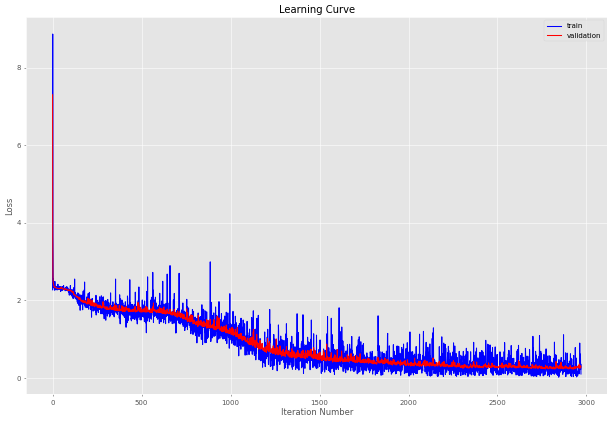

In [15]:
epoch = 1
lr=1
batch_size = 20

# 標準化処理とSVMをパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchSimpleNeuralNetrowkClassifier(    #推定器
        node_num_list=[400, 200, 10],    # 第1層、第2層、出力層のノード数のリスト 
        active_func_name_list=["sigmoid", "sigmoid", "softmax"],    # 第1層、第2層、出力層の活性化関数のリスト
        epoch=epoch,
        lr=lr,   # 学習率
        batch_size=batch_size, 
        sigma=0.01, random_state=0, verbose = False)
    )
])
# (self, node_num_list=[400, 200, 10], 
active_func_name_list=["sigmoid", "sigmoid", "softmax"], 

# データセットに対して学習・推定・評価
X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

#### ・スクラッチクラスによる分類（エポック:1、学習率:1、バッチサイズ:1000、標準化無し）

y_true:
[1 1 7 4 4 3 9 9 6 0 9 7 2 0 8 9 3 7 9 3 3 1 7 7 2 6 2 8 4 4 9 0 8 9 5 7 6
 7 0 9 4 6 7 1 6 8 2 2 9 6 1 1 1 5 8 1 0 5 7 1 0 2 5 9 1 3 7 7 1 9 4 7 7 6
 5 7 3 9 1 0 1 4 2 2 5 2 6 5 4 4 9 3 9 8 0 6 9 1 7 6 4 1 6 7 8 6 3 9 2 2 0
 5 5 0 6 9 4 6 8 3 1 1 3 1 9 8 4 8 9 3 6 8 9 7 7 2 5 9 5 7 1 7 4 8 2 8 4 9
 4 2 7 5 5 5 8 8 4 6 5 4 8 6 3 5 1 6 5 3 3 0 3 3 9 2 4 6 5 1 2 9 1 2 2 8 7
 4 7 6 1 8 9 0 5 0 1 8 0 2 0 8 0 7 9 5 9 8 4 9 7 0 9 5 9 8 6 3 0 9 0 2 8 4
 6 1 6 5 7 2 8 4 1 6 5 0 9 0 4 7 2 9 8 6 6 8 9 2 1 8 0 9 6 1 7 1 6 7 5 7 8
 2 7 5 2 1 6 8 3 3 9 0 3 0 1 1 8 9 3 1 1 1 5 4 8 6 0 0 2 8 5 5 8 1 0 0 2 6
 7 6 9 8 8 2 3 5 4 7 4 9 8 2 7 0 0 7 0 3 8 8 7 4 5 4 0 6 4 0 6 1 5 3 4 3 5
 0 7 3 8 5 5 7 8 4 6 7 3 9 7 9 9 3 1 3 2 6 8 0 6 5 4 7 8 0 6 3 5 6 9 3 3 8
 3 1 3 5 2 4 3 2 5 3 4 0 5 0 1 5 1 8 6 3 6 5 1 9 4 3 9 6 0 3 6 3 4 8 7 0 0
 9 6 5 2 8 9 5 1 4 7 9 5 2 4 4 2 0 4 3 3 0 5 7 0 4 1 1 1 0 8 8 0 1 3 6 3 6
 8 3 7 8 6 6 0 9 0 0 9 2 0 6 6 0 6 9 3 9 9 8 8 7 6 0 3 8 3 0 5 7 4 0 1 7 0
 7 7 3 0 3 7 5 1 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,0,67,0,0,0,0,0,0,0,0
1,0,64,0,0,0,0,0,0,0,0
2,0,44,0,0,0,0,0,0,0,0
3,0,60,0,0,0,0,0,0,0,0
4,0,52,0,0,0,0,0,0,0,0
5,0,57,0,0,0,0,0,0,0,0
6,0,58,0,0,0,0,0,0,0,0
7,0,65,0,0,0,0,0,0,0,0
8,0,68,0,0,0,0,0,0,0,0
9,0,65,0,0,0,0,0,0,0,0




スコアボード1:


,"ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:59, b_size:1000, lr:1, 標準化:無し)"
Accuacy,0.910000,0.106667
Precision,0.913460,0.010667
Recall,0.909545,0.100000
F1,0.908839,0.019277


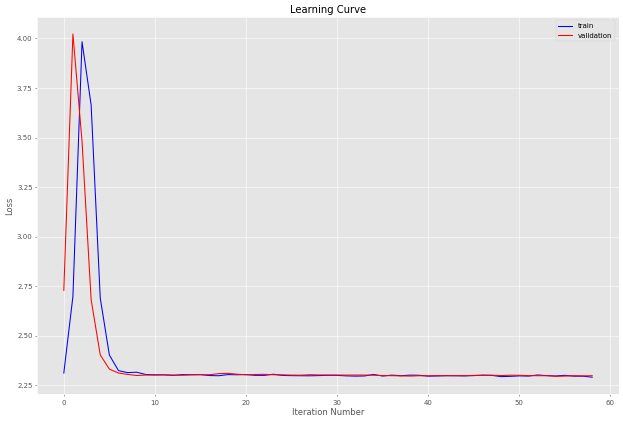

In [16]:
epoch = 1
lr=1
batch_size = 1000

# 標準化処理とSVMをパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchSimpleNeuralNetrowkClassifier(    #推定器
        node_num_list=[400, 200, 10],    # 第1層、第2層、出力層のノード数のリスト 
        active_func_name_list=["sigmoid", "sigmoid", "softmax"],    # 第1層、第2層、出力層の活性化関数のリスト
        epoch=epoch,
        lr=lr,   # 学習率
        batch_size=batch_size, 
        sigma=0.01, random_state=0, verbose = False)
    )
])
# (self, node_num_list=[400, 200, 10], 
active_func_name_list=["sigmoid", "sigmoid", "softmax"], 

# データセットに対して学習・推定・評価
X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

#### ・スクラッチクラスによる分類（エポック:40、学習率:1、バッチサイズ:1000、標準化無し）

y_true:
[1 1 7 4 4 3 9 9 6 0 9 7 2 0 8 9 3 7 9 3 3 1 7 7 2 6 2 8 4 4 9 0 8 9 5 7 6
 7 0 9 4 6 7 1 6 8 2 2 9 6 1 1 1 5 8 1 0 5 7 1 0 2 5 9 1 3 7 7 1 9 4 7 7 6
 5 7 3 9 1 0 1 4 2 2 5 2 6 5 4 4 9 3 9 8 0 6 9 1 7 6 4 1 6 7 8 6 3 9 2 2 0
 5 5 0 6 9 4 6 8 3 1 1 3 1 9 8 4 8 9 3 6 8 9 7 7 2 5 9 5 7 1 7 4 8 2 8 4 9
 4 2 7 5 5 5 8 8 4 6 5 4 8 6 3 5 1 6 5 3 3 0 3 3 9 2 4 6 5 1 2 9 1 2 2 8 7
 4 7 6 1 8 9 0 5 0 1 8 0 2 0 8 0 7 9 5 9 8 4 9 7 0 9 5 9 8 6 3 0 9 0 2 8 4
 6 1 6 5 7 2 8 4 1 6 5 0 9 0 4 7 2 9 8 6 6 8 9 2 1 8 0 9 6 1 7 1 6 7 5 7 8
 2 7 5 2 1 6 8 3 3 9 0 3 0 1 1 8 9 3 1 1 1 5 4 8 6 0 0 2 8 5 5 8 1 0 0 2 6
 7 6 9 8 8 2 3 5 4 7 4 9 8 2 7 0 0 7 0 3 8 8 7 4 5 4 0 6 4 0 6 1 5 3 4 3 5
 0 7 3 8 5 5 7 8 4 6 7 3 9 7 9 9 3 1 3 2 6 8 0 6 5 4 7 8 0 6 3 5 6 9 3 3 8
 3 1 3 5 2 4 3 2 5 3 4 0 5 0 1 5 1 8 6 3 6 5 1 9 4 3 9 6 0 3 6 3 4 8 7 0 0
 9 6 5 2 8 9 5 1 4 7 9 5 2 4 4 2 0 4 3 3 0 5 7 0 4 1 1 1 0 8 8 0 1 3 6 3 6
 8 3 7 8 6 6 0 9 0 0 9 2 0 6 6 0 6 9 3 9 9 8 8 7 6 0 3 8 3 0 5 7 4 0 1 7 0
 7 7 3 0 3 7 5 1 

,0,1,2,3,4,5,6,7,8,9
0,66,0,0,0,0,1,0,0,0,0
1,0,63,1,0,0,0,0,0,0,0
2,0,1,41,0,0,0,0,1,1,0
3,3,0,1,55,0,0,0,0,1,0
4,0,0,0,0,51,0,0,0,0,1
5,0,0,0,1,2,52,1,0,1,0
6,0,0,1,0,0,1,56,0,0,0
7,0,0,1,0,0,0,0,64,0,0
8,1,1,1,2,0,0,0,0,62,1
9,0,0,0,1,4,1,0,0,0,59




スコアボード1:


,"ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:40, iter:59, b_size:1000, lr:1, 標準化:無し)"
Accuacy,0.910000,0.106667,0.948333
Precision,0.913460,0.010667,0.946392
Recall,0.909545,0.100000,0.948057
F1,0.908839,0.019277,0.946745


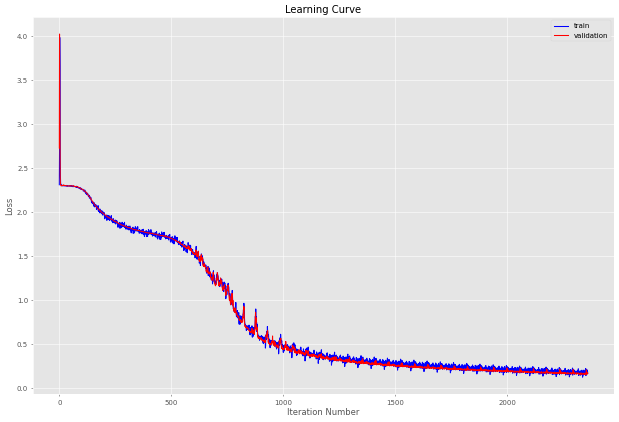

In [17]:
epoch = 40
lr=1
batch_size = 1000

# 標準化処理とSVMをパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchSimpleNeuralNetrowkClassifier(    #推定器
        node_num_list=[400, 200, 10],    # 第1層、第2層、出力層のノード数のリスト 
        active_func_name_list=["sigmoid", "sigmoid", "softmax"],    # 第1層、第2層、出力層の活性化関数のリスト
        epoch=epoch,
        lr=lr,   # 学習率
        batch_size=batch_size, 
        sigma=0.01, random_state=0, verbose = False)
    )
])
# (self, node_num_list=[400, 200, 10], 
active_func_name_list=["sigmoid", "sigmoid", "softmax"], 

# データセットに対して学習・推定・評価
X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline3 = pipeline
columns3 = columns

#### ・スクラッチクラスによる分類（エポック:1、学習率:1、バッチサイズ:20、標準化あり）

y_true:
[1 1 7 4 4 3 9 9 6 0 9 7 2 0 8 9 3 7 9 3 3 1 7 7 2 6 2 8 4 4 9 0 8 9 5 7 6
 7 0 9 4 6 7 1 6 8 2 2 9 6 1 1 1 5 8 1 0 5 7 1 0 2 5 9 1 3 7 7 1 9 4 7 7 6
 5 7 3 9 1 0 1 4 2 2 5 2 6 5 4 4 9 3 9 8 0 6 9 1 7 6 4 1 6 7 8 6 3 9 2 2 0
 5 5 0 6 9 4 6 8 3 1 1 3 1 9 8 4 8 9 3 6 8 9 7 7 2 5 9 5 7 1 7 4 8 2 8 4 9
 4 2 7 5 5 5 8 8 4 6 5 4 8 6 3 5 1 6 5 3 3 0 3 3 9 2 4 6 5 1 2 9 1 2 2 8 7
 4 7 6 1 8 9 0 5 0 1 8 0 2 0 8 0 7 9 5 9 8 4 9 7 0 9 5 9 8 6 3 0 9 0 2 8 4
 6 1 6 5 7 2 8 4 1 6 5 0 9 0 4 7 2 9 8 6 6 8 9 2 1 8 0 9 6 1 7 1 6 7 5 7 8
 2 7 5 2 1 6 8 3 3 9 0 3 0 1 1 8 9 3 1 1 1 5 4 8 6 0 0 2 8 5 5 8 1 0 0 2 6
 7 6 9 8 8 2 3 5 4 7 4 9 8 2 7 0 0 7 0 3 8 8 7 4 5 4 0 6 4 0 6 1 5 3 4 3 5
 0 7 3 8 5 5 7 8 4 6 7 3 9 7 9 9 3 1 3 2 6 8 0 6 5 4 7 8 0 6 3 5 6 9 3 3 8
 3 1 3 5 2 4 3 2 5 3 4 0 5 0 1 5 1 8 6 3 6 5 1 9 4 3 9 6 0 3 6 3 4 8 7 0 0
 9 6 5 2 8 9 5 1 4 7 9 5 2 4 4 2 0 4 3 3 0 5 7 0 4 1 1 1 0 8 8 0 1 3 6 3 6
 8 3 7 8 6 6 0 9 0 0 9 2 0 6 6 0 6 9 3 9 9 8 8 7 6 0 3 8 3 0 5 7 4 0 1 7 0
 7 7 3 0 3 7 5 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:269: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:269: RuntimeWarning: overflow encountered in exp


,0,1,2,3,4,5,6,7,8,9
0,60,0,0,0,0,3,3,0,0,1
1,0,63,1,0,0,0,0,0,0,0
2,0,3,35,3,0,0,0,2,1,0
3,0,2,1,47,0,2,0,2,4,2
4,0,0,1,0,47,1,1,0,1,1
5,0,0,0,0,3,53,0,0,1,0
6,0,0,1,0,0,1,54,2,0,0
7,0,0,1,0,1,1,0,56,0,6
8,0,3,1,2,0,4,2,1,54,1
9,0,0,0,0,9,2,0,0,1,53




スコアボード1:


,"ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:40, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:あり)"
Accuacy,0.910000,0.106667,0.948333,0.870000
Precision,0.913460,0.010667,0.946392,0.870719
Recall,0.909545,0.100000,0.948057,0.869443
F1,0.908839,0.019277,0.946745,0.867788


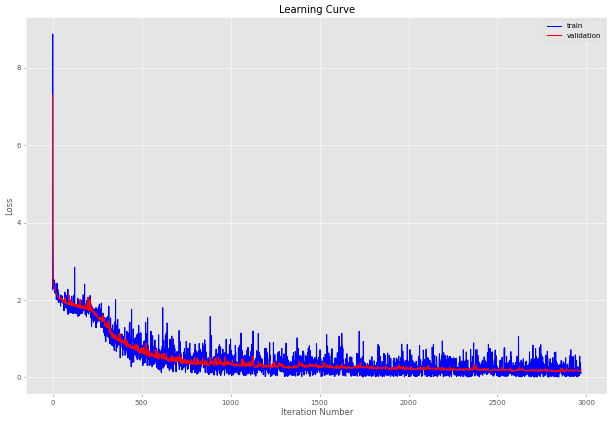

In [18]:
epoch = 1
lr=1
batch_size = 20

# 標準化処理とSVMをパイプラインに組み込み
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchSimpleNeuralNetrowkClassifier(    #推定器
        node_num_list=[400, 200, 10],    # 第1層、第2層、出力層のノード数のリスト 
        active_func_name_list=["sigmoid", "sigmoid", "softmax"],    # 第1層、第2層、出力層の活性化関数のリスト
        epoch=epoch,
        lr=lr,   # 学習率
        batch_size=batch_size, 
        sigma=0.01, random_state=0, verbose = False)
    )
])
# (self, node_num_list=[400, 200, 10], 
active_func_name_list=["sigmoid", "sigmoid", "softmax"], 


X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

# 標準化
pipeline["scaler"].fit(X)
X = pipeline["scaler"].transform(X)
Xt = pipeline["scaler"].transform(Xt)

# 学習・推定・評価
pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:あり)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline4 = pipeline
columns4 = columns

#### ・スクラッチクラスによる分類（エポック:100、学習率:1、バッチサイズ:59400、標準化無し）

y_true:
[1 1 7 4 4 3 9 9 6 0 9 7 2 0 8 9 3 7 9 3 3 1 7 7 2 6 2 8 4 4 9 0 8 9 5 7 6
 7 0 9 4 6 7 1 6 8 2 2 9 6 1 1 1 5 8 1 0 5 7 1 0 2 5 9 1 3 7 7 1 9 4 7 7 6
 5 7 3 9 1 0 1 4 2 2 5 2 6 5 4 4 9 3 9 8 0 6 9 1 7 6 4 1 6 7 8 6 3 9 2 2 0
 5 5 0 6 9 4 6 8 3 1 1 3 1 9 8 4 8 9 3 6 8 9 7 7 2 5 9 5 7 1 7 4 8 2 8 4 9
 4 2 7 5 5 5 8 8 4 6 5 4 8 6 3 5 1 6 5 3 3 0 3 3 9 2 4 6 5 1 2 9 1 2 2 8 7
 4 7 6 1 8 9 0 5 0 1 8 0 2 0 8 0 7 9 5 9 8 4 9 7 0 9 5 9 8 6 3 0 9 0 2 8 4
 6 1 6 5 7 2 8 4 1 6 5 0 9 0 4 7 2 9 8 6 6 8 9 2 1 8 0 9 6 1 7 1 6 7 5 7 8
 2 7 5 2 1 6 8 3 3 9 0 3 0 1 1 8 9 3 1 1 1 5 4 8 6 0 0 2 8 5 5 8 1 0 0 2 6
 7 6 9 8 8 2 3 5 4 7 4 9 8 2 7 0 0 7 0 3 8 8 7 4 5 4 0 6 4 0 6 1 5 3 4 3 5
 0 7 3 8 5 5 7 8 4 6 7 3 9 7 9 9 3 1 3 2 6 8 0 6 5 4 7 8 0 6 3 5 6 9 3 3 8
 3 1 3 5 2 4 3 2 5 3 4 0 5 0 1 5 1 8 6 3 6 5 1 9 4 3 9 6 0 3 6 3 4 8 7 0 0
 9 6 5 2 8 9 5 1 4 7 9 5 2 4 4 2 0 4 3 3 0 5 7 0 4 1 1 1 0 8 8 0 1 3 6 3 6
 8 3 7 8 6 6 0 9 0 0 9 2 0 6 6 0 6 9 3 9 9 8 8 7 6 0 3 8 3 0 5 7 4 0 1 7 0
 7 7 3 0 3 7 5 1 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,0,67,0,0,0,0,0,0,0,0
1,0,64,0,0,0,0,0,0,0,0
2,0,44,0,0,0,0,0,0,0,0
3,0,60,0,0,0,0,0,0,0,0
4,0,51,0,0,0,0,0,1,0,0
5,0,57,0,0,0,0,0,0,0,0
6,0,58,0,0,0,0,0,0,0,0
7,0,65,0,0,0,0,0,0,0,0
8,0,68,0,0,0,0,0,0,0,0
9,0,63,0,0,0,0,0,2,0,0




スコアボード1:


,"ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:40, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:あり)","ScratchSimpleNNC(epoch:100, iter:1, b_size:59400, lr:1, 標準化:無し)"
Accuacy,0.910000,0.106667,0.948333,0.870000,0.106667
Precision,0.913460,0.010667,0.946392,0.870719,0.010720
Recall,0.909545,0.100000,0.948057,0.869443,0.100000
F1,0.908839,0.019277,0.946745,0.867788,0.019365


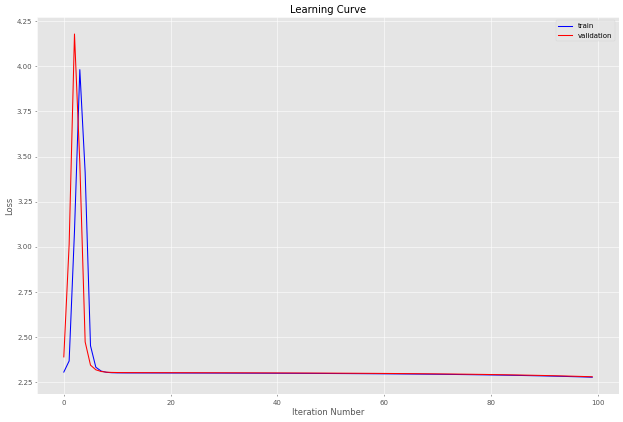

In [19]:
epoch = 100
lr=1
batch_size = 59400

# 標準化処理とSVMをパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchSimpleNeuralNetrowkClassifier(    #推定器
        node_num_list=[400, 200, 10],    # 第1層、第2層、出力層のノード数のリスト 
        active_func_name_list=["sigmoid", "sigmoid", "softmax"],    # 第1層、第2層、出力層の活性化関数のリスト
        epoch=epoch,
        lr=lr,   # 学習率
        batch_size=batch_size, 
        sigma=0.01, random_state=0, verbose = False)
    )
])
# (self, node_num_list=[400, 200, 10], 
active_func_name_list=["sigmoid", "sigmoid", "softmax"], 

# データセットに対して学習・推定・評価
X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline5 = pipeline
columns5 = columns

#### ・スクラッチクラスによる分類（エポック:1、学習率:1、バッチサイズ:20、標準化無し、学習データ数を1/10に削減）

y_true:
[0 4 1 ... 1 9 5]
y_predict:
[8 6 7 ... 7 6 8]
y_predict_proba:
[[0.11805844 0.01264075 0.08557193 ... 0.0232732  0.27791133 0.08255971]
 [0.08828093 0.04722012 0.09469928 ... 0.07085525 0.09038698 0.12136642]
 [0.03535649 0.1705056  0.06478404 ... 0.19330492 0.01158964 0.1222907 ]
 ...
 [0.04263473 0.14334349 0.07155021 ... 0.17015796 0.01684751 0.12674869]
 [0.09286751 0.04139508 0.09529033 ... 0.06357318 0.10450853 0.11826655]
 [0.1100173  0.02221305 0.09307439 ... 0.03772859 0.18651956 0.10044285]]


###Confusion matrix（混同行列）###


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,3,0,0,0,127,0
1,0,61,0,0,21,0,3,50,0,0
2,0,0,0,0,26,0,25,5,81,0
3,0,0,0,0,22,0,24,3,76,0
4,0,0,0,0,57,0,34,4,20,0
5,0,0,0,0,25,0,10,0,54,0
6,0,0,0,0,22,0,22,2,71,0
7,0,31,0,0,35,0,3,61,0,0
8,0,0,0,0,9,0,13,1,82,0
9,0,1,0,0,70,0,28,6,12,0




スコアボード1:


,"ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:40, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:あり)","ScratchSimpleNNC(epoch:100, iter:1, b_size:59400, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:240, b_size:20, lr:1, 標準化:無し, データ数:1/10)"
Accuacy,0.910000,0.106667,0.948333,0.870000,0.106667,0.235833
Precision,0.913460,0.010667,0.946392,0.870719,0.010720,0.160718
Recall,0.909545,0.100000,0.948057,0.869443,0.100000,0.238572
F1,0.908839,0.019277,0.946745,0.867788,0.019365,0.170107


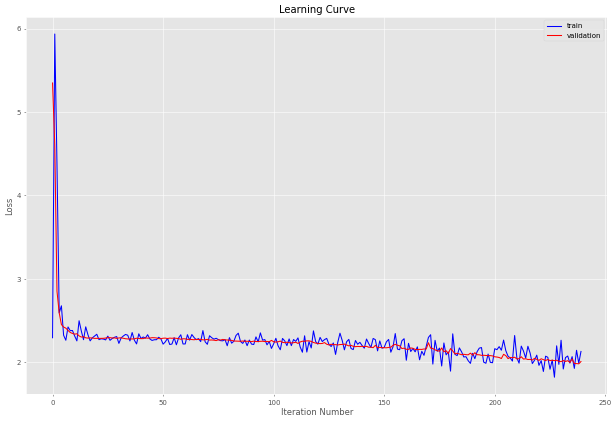

In [20]:
epoch = 1
lr=1
batch_size = 20

# 標準化処理とSVMをパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchSimpleNeuralNetrowkClassifier(    #推定器
        node_num_list=[400, 200, 10],    # 第1層、第2層、出力層のノード数のリスト 
        active_func_name_list=["sigmoid", "sigmoid", "softmax"],    # 第1層、第2層、出力層の活性化関数のリスト
        epoch=epoch,
        lr=lr,   # 学習率
        batch_size=batch_size, 
        sigma=0.01, random_state=0, verbose = False)
    )
])
# (self, node_num_list=[400, 200, 10], 
active_func_name_list=["sigmoid", "sigmoid", "softmax"], 

# データセットに対して学習・推定・評価
X = X_train2
Xt = X_test2
y = y_train2
yt = y_test2

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し, データ数:1/10)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline6 = pipeline
columns6 = columns

## 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値はさまざまな方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

### 【問題1 解答】
各層の重みの初期化処理を、_init_variablesメソッドに実装した。

## 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

- batch_size = 20 # バッチサイズ
- n_features = 784 # 特徴量の数
- n_nodes1 = 400 # 1層目のノード数
- n_nodes2 = 200 # 2層目のノード数
- n_output = 10 # 出力のクラス数（3層目のノード数）

### 【問題2 解答】
フォワードプロパゲーション（順伝播）処理を_forward_propagationメソッド内に実装した。


## 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 
L
 は次の数式です。

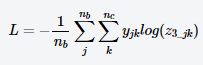

$y_{jk}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


$z_{3_{jk}}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）


$n_{b}$ : バッチサイズ、batch_size


$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。


実数におけるlog(x)の定義域は0 < xです。したがって、logの中身がとても小さい値になってしまったときエラーを起こします。そこでlogの中に1e-7を足すことでエラーを回避できます。


こういった処理はlogに限らず、さまざまな場所で出てくることがあります。

### 【問題3 解答】
損失関数の算出処理を_calcurate_lossメソッド内に実装した。

## 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。


まず、i層目の重みとバイアスの更新式です。 
W
i
 と 
B
i
 に対し、更新後の 
W
′
i
 と 
B
′
i
 は次の数式で求められます。

 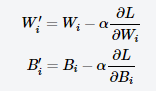

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的にはすべて同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。


この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。

### 【問題4 解答】
_backward_propagationメソッド内にバックワードプロパゲーション（逆伝播）処理を実装した。


「3層目」

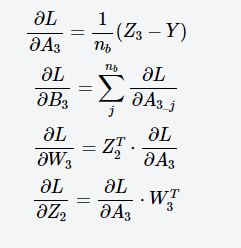

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)


$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)


$Y$ : 正解ラベル (batch_size, n_output)


$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)


$W_3$ : 3層目の重み (n_nodes2, n_output)


$n_{b}$ : バッチサイズ、batch_size

## 【問題5】推定
推定を行うメソッドを作成してください。


フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

### 【問題5 解答】
predictメソッド内に推定処理を実装した。


## 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [37]:
print("■ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)")
score_board1.display("ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)")

■ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)
###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,64,0,0,0,0,3,0,0,0,0
1,0,62,0,0,0,2,0,0,0,0
2,0,3,37,0,1,0,0,1,1,1
3,1,0,1,51,0,1,0,2,1,3
4,0,0,0,0,52,0,0,0,0,0
5,0,0,0,1,3,51,0,0,1,1
6,0,0,0,0,1,2,55,0,0,0
7,0,0,1,0,2,0,0,61,0,1
8,2,1,0,3,0,2,0,2,58,0
9,0,0,0,0,9,1,0,0,0,55


###スコアボード###


,"ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:40, iter:59, b_size:1000, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:あり)","ScratchSimpleNNC(epoch:100, iter:1, b_size:59400, lr:1, 標準化:無し)","ScratchSimpleNNC(epoch:1, iter:240, b_size:20, lr:1, 標準化:無し, データ数:1/10)"
Accuacy,0.910000,0.106667,0.948333,0.870000,0.106667,0.235833
Precision,0.913460,0.010667,0.946392,0.870719,0.010720,0.160718
Recall,0.909545,0.100000,0.948057,0.869443,0.100000,0.238572
F1,0.908839,0.019277,0.946745,0.867788,0.019365,0.170107


### 【問題6 解答】
MNISTのデータを学習・推定し、Accuracyを含む各精度指標を算出したところ、上表のような結果となった。
今回試した組み合わせの中では「epoch:40, iter:59, b_size:1000, lr:1, 標準化:無し」のパターンで最も高い推定精度が得られた。
今回試した限りでは、バッチサイズをなるべく小さくしてエポックを増やした方が高い推定精度を確保しつつ比較的短時間で学習を完了できる傾向が見られた。
<br><br>
（補足）
当初は学習データと検証データを48000:12000に分割していたが、学習に非常に時間がかかり非効率であったため、59400:600に分割して実行した。


## 【問題7】学習曲線のプロット
学習曲線をプロットしてください。


ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

■ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:無し)


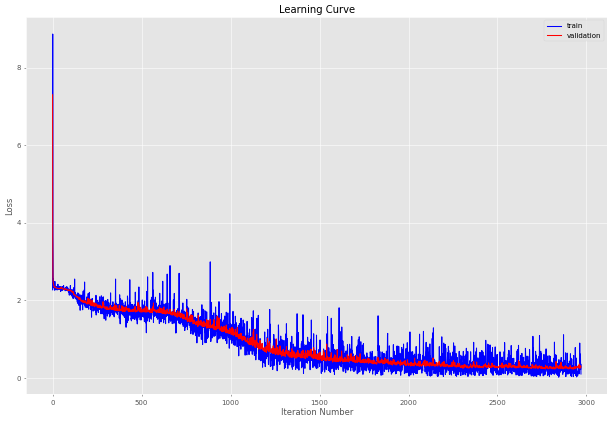

■ScratchSimpleNNC(epoch:1, iter:59, b_size:1000, lr:1, 標準化:無し)


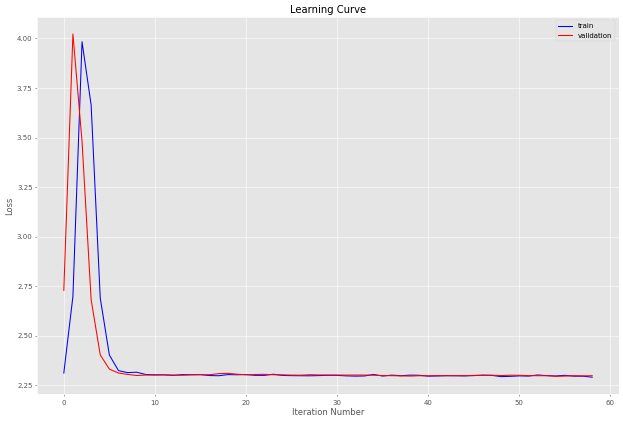

■ScratchSimpleNNC(epoch:40, iter:59, b_size:1000, lr:1, 標準化:無し)


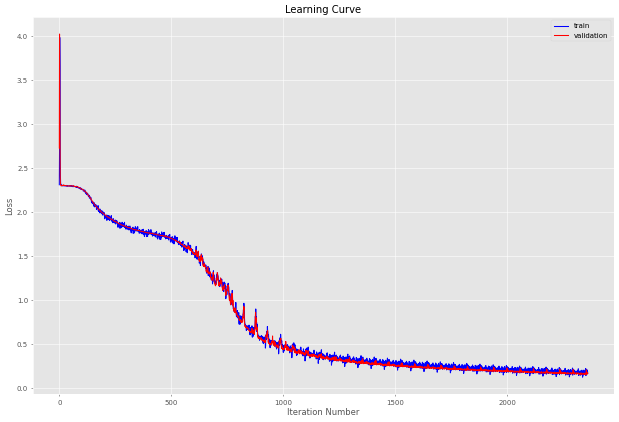

■ScratchSimpleNNC(epoch:1, iter:2970, b_size:20, lr:1, 標準化:あり)


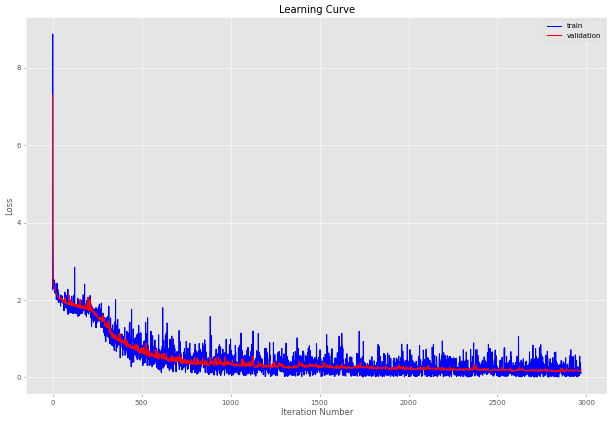

■ScratchSimpleNNC(epoch:100, iter:0, b_size:59400, lr:1, 標準化:無し)


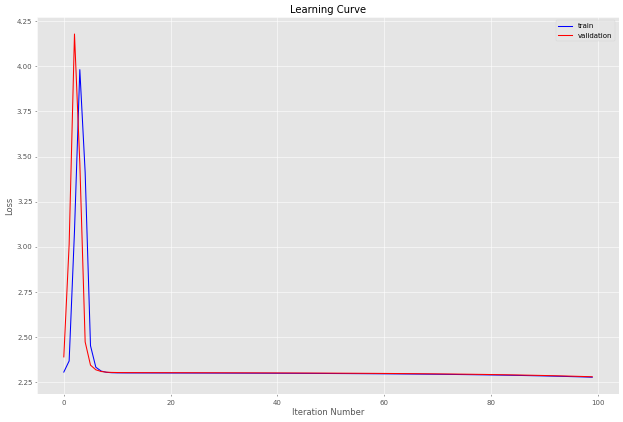

■ScratchSimpleNNC(epoch:1, iter:240, b_size:20, lr:1, 標準化:無し, データ数:1/10)


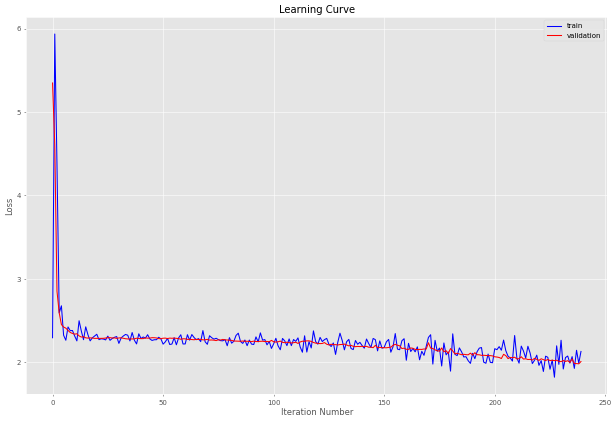

In [39]:
# 学習曲線をプロット
print("■" + columns1)
pipeline1["classifier"].plot_learning_curve()
print("■" + columns2)
pipeline2["classifier"].plot_learning_curve()
print("■" + columns3)
pipeline3["classifier"].plot_learning_curve()
print("■" + columns4)
pipeline4["classifier"].plot_learning_curve()
print("■" + columns5)
pipeline5["classifier"].plot_learning_curve()
print("■" + columns6)
pipeline6["classifier"].plot_learning_curve()

### 【問題7 解答】
ハイパーパラメータや学習データのサンプル数などを複数パターン用意して学習・推定・評価を行い、学習曲線をプロットした。
バッチサイズを小さくした場合は大きい場合に比べ、学習データの学習曲線が上下に振動しながら減少していく現象が見られた。